# Weak Scalability of Mandelbrot (algorithm only)

In [3]:
%cd ~/work/Thesis/programs/mandelbrot

/home/jovyan/work/Thesis/programs/mandelbrot


In [4]:
import numpy as np

#start of parameters you might want to adjust
problemsize = np.array([50,100,200,400,800,1600,3200])
threads = np.array([1,2,4,8,16,32,64])
#end of parameters you might want to adjust

print("We want to run the code with:")
print(str(threads[0])+" thread and problem size " + str(problemsize[0]))
for i in range(len(threads)-1):
    print(str(threads[i+1])+" threads and problem size " + str(problemsize[i+1]))

We want to run the code with:
1 thread and problem size 50
2 threads and problem size 100
4 threads and problem size 200
8 threads and problem size 400
16 threads and problem size 800
32 threads and problem size 1600
64 threads and problem size 3200


You have to manually adjust the time measurements in the following code cell, so it measures with the problem size and thread number you decided on. The values you set for the variables 'threads' and 'problem_size' in the previous code cell have to match the values you pass as arguments in the following code cell. Remember, the first argument you pass is the thread number, the second argument is the number of repeats, and the third argument is the problem size. You have to type out the full number in the terminal command; something like '1e5*8' will not work. `>/dev/null` supresses the terminal output.

In [5]:
time_parallel = []
time_serial = []

# measure serial execution time
! ./timing.o 1 5 50 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 100  >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 200 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 400 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 800 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 1600 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))
! ./timing.o 1 5 3200 >/dev/null
time_serial.append(np.genfromtxt('./time.txt'))

# measure parallel execution time
! ./timing.o 1 5 50 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 2 5 100 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 4 5 200 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 8 5 400 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 16 5 800 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 32 5 1600 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))
! ./timing.o 64 5 3200 >/dev/null
time_parallel.append(np.genfromtxt('./time.txt'))

# calculate speedup and efficiency
speedup = np.array(time_serial)/np.array(time_parallel)
efficiency = speedup/threads

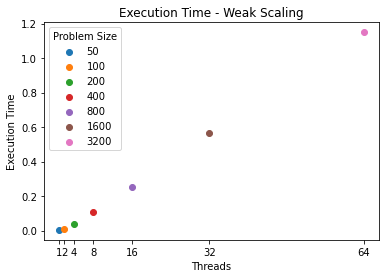

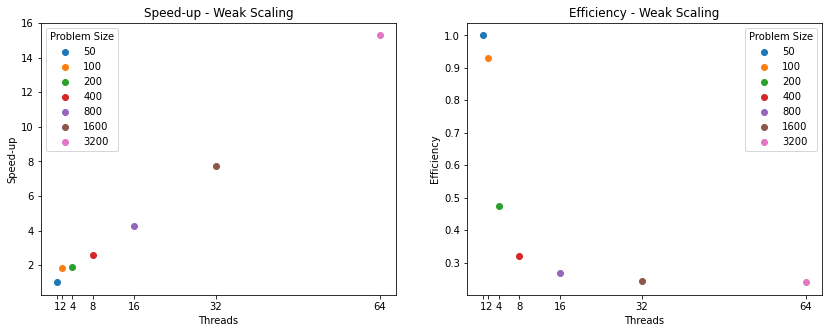

In [7]:
# plot results

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# plot
fig,ax = plt.subplots(figsize=(6,4))
for i in range(len(threads)):
    ax.scatter(threads[i],time_parallel[i],label=problemsize[i])
ax.set_xticks(threads)
ax.set_xticklabels(threads)
ax.set_ylabel('Execution Time')
ax.set_xlabel('Threads')
ax.set_title('Execution Time - Weak Scaling')
ax.legend(title="Problem Size")

fig,ax = plt.subplots(1,2,figsize=(14,5))
for i in range(len(threads)):
    ax[0].scatter(threads[i],speedup[i],label=problemsize[i])
ax[0].set_xticks(threads)
ax[0].set_xticklabels(threads)
ax[0].set_ylabel('Speed-up')
ax[0].set_xlabel('Threads')
ax[0].set_title('Speed-up - Weak Scaling')
ax[0].legend(title="Problem Size")

for i in range(len(threads)):
    ax[1].scatter(threads[i],efficiency[i],label=problemsize[i])
ax[1].set_xticks(threads)
ax[1].set_xticklabels(threads)
ax[1].set_ylabel('Efficiency')
ax[1].set_xlabel('Threads')
ax[1].set_title('Efficiency - Weak Scaling');
ax[1].legend(title="Problem Size");